In [1]:
source("/secure/projects/HTAPP_MBC/src/init_phase2.R")
library(liger)
library(stringr)

Loading combined annotation: annot

Loading required package: cowplot

Loading required package: Matrix

Loading required package: patchwork


Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots




In [2]:
#font size needs to be bigger - maybe interference with liger?
theme_set(theme_bw(base_size=16))
theme_update(axis.text=element_text(color="black"), panel.grid.minor = element_blank(),panel.background = element_rect(fill = "white"))

In [3]:
out=paste0(analysisDir,"/05_LIGER/")

In [4]:
lda=40
k=20
cell_type="Malignant_noRP"

In [5]:
load(paste0(out,"/compartments_frozen/",cell_type,"_lambda_",lda,"_k_",k,"_LIGER.RData"))
W_frozen=data.frame(ligerex@W,row.names = paste0("Factor_",1:nrow(ligerex@W)))
row.names(W_frozen)=paste0(row.names(W_frozen),"_frozen")

In [6]:
load(paste0(out,"/compartments_fresh/",cell_type,"_lambda_",lda,"_k_",k,"_LIGER.RData"))
W_fresh=data.frame(ligerex@W,row.names = paste0("Factor_",1:nrow(ligerex@W)))
row.names(W_fresh)=paste0(row.names(W_fresh),"_fresh")
rm(ligerex)

In [7]:
common_cols=colnames(W_frozen)[colnames(W_frozen)%in%colnames(W_fresh)]
W_combined=rbind(W_frozen[,common_cols],W_fresh[,common_cols])

In [8]:
length(common_cols)

[1] 3251

In [9]:
cors_w=cor(t(W_combined))

In [10]:
annot=data.table(protocol=gsub(".*_","",row.names(cors_w)))
row.names(annot)=row.names=row.names(cors_w)

png 
  2

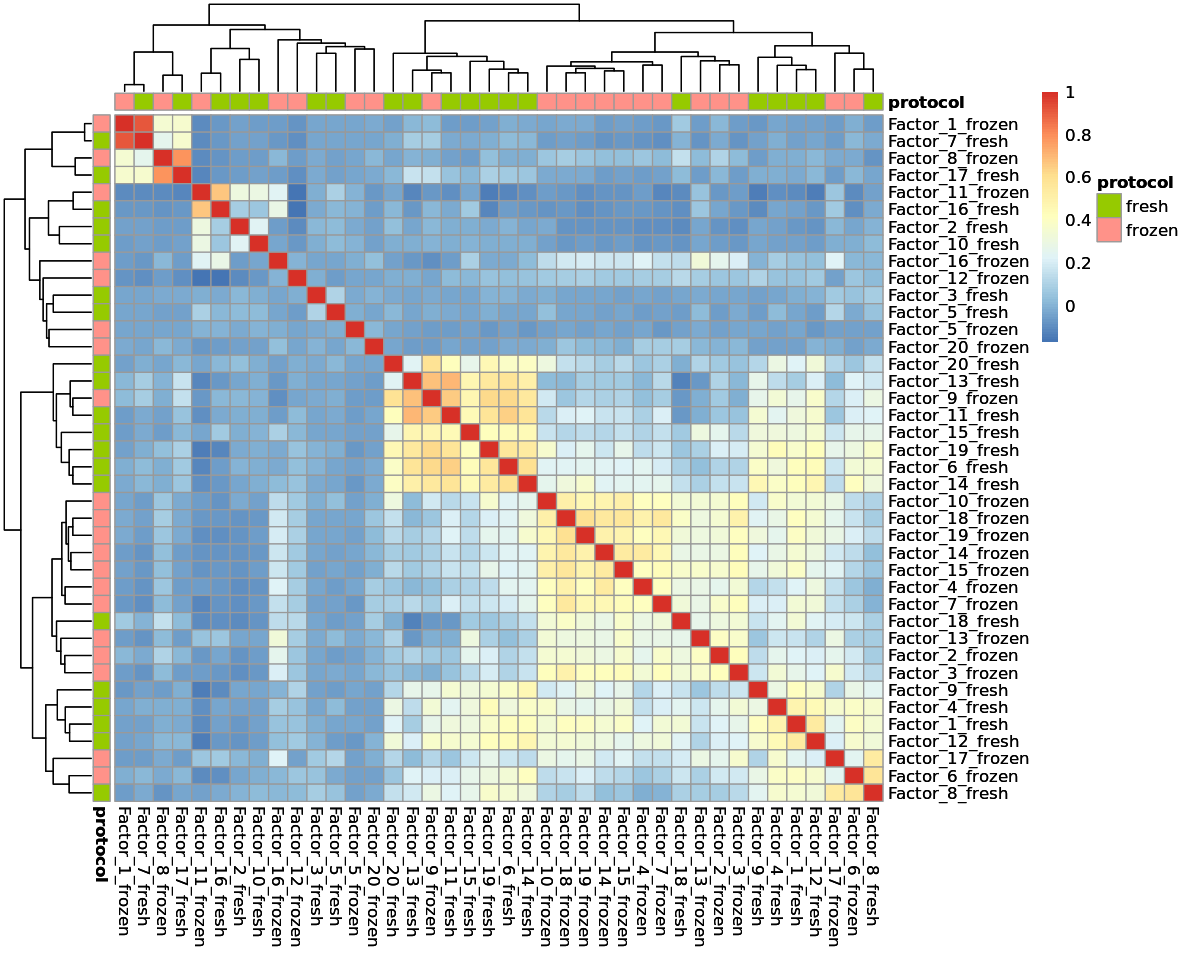

In [11]:
library(pheatmap)
options(repr.plot.width = 10, repr.plot.height =8)
pl=pheatmap(cors_w,annotation_col = annot, annotation_row = annot)
pdf(paste0(out,"/",cell_type,"_lambda_",lda,"_k_",k,"_LIGER_fresh_frozen_cor.pdf"),height=8,width=10)
print(pl)
dev.off()
pl